,percent,total,calls,mean,"substring(digest_text,1,75)"
0,25.3622,256596737000,1,256596737000,SELECT * FROM `information_schema` . `tables`
1,25.1383,254331409000,18,14129522000,SELECT SYSTEM_USER FROM `sys` . `x$user_summary` ORDER BY `table_scans` DES
2,21.3256,215757252000,74,2915638000,SELECT * FROM `sys` . `statement_analysis` WHERE QUERY IS NOT NULL AND QUER
3,4.9489,50069905000,1,50069905000,"SELECT `t` . `TABLE_SCHEMA` , `t` . `TABLE_NAME` , ENGINE FROM `information"
4,3.6074,36497104000,1,36497104000,SELECT * FROM `sys` . `schema_redundant_indexes` LIMIT ?


,percent,total,calls,mean
0,25.3622,256596737000,1,256596737000
1,25.1383,254331409000,18,14129522000
2,21.3256,215757252000,74,2915638000
3,4.9489,50069905000,1,50069905000
4,3.6074,36497104000,1,36497104000


SelectMultiple(description='y', options=('percent', 'total', 'calls', 'mean'), value=())

Button(description='Draw', style=ButtonStyle())

['substring(digest_text,1,75)']


,percent,total,calls,mean,"substring(digest_text,1,75)"
0,25.3622,256596737000,1,256596737000,SELECT * FROM `information_schema` . `tables`
1,25.1383,254331409000,18,14129522000,SELECT SYSTEM_USER FROM `sys` . `x$user_summar...
2,21.3256,215757252000,74,2915638000,SELECT * FROM `sys` . `statement_analysis` WHE...
3,4.9489,50069905000,1,50069905000,"SELECT `t` . `TABLE_SCHEMA` , `t` . `TABLE_NAM..."
4,3.6074,36497104000,1,36497104000,SELECT * FROM `sys` . `schema_redundant_indexe...


percent


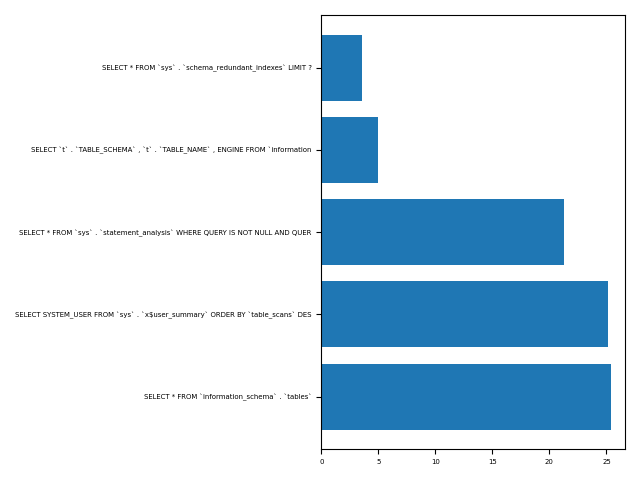

In [103]:
from mysql_collect_test import connect_config
from driver.collector.collector_factory import get_collector
from driver.collector.mysql_collector import MysqlCollector
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

QUERY_EXAMPLE = """SELECT (100 * SUM_TIMER_WAIT / sum(SUM_TIMER_WAIT) OVER ()) percent, 
        sum_timer_wait as total, 
        count_star as calls, 
        avg_timer_wait as mean,
        substring(digest_text,1,75)
FROM 
performance_schema.events_statements_summary_by_digest 
        ORDER BY sum_timer_wait DESC
        LIMIT 5;"""
config = connect_config()

def q(query):
    with get_collector(config) as collector:
       # print(collector._cmd(query))  # 0 data 1 meta
       
        df = pd.read_sql(query, con=collector.get_conn())
        from IPython.core.display import HTML
        display(HTML(df.to_html()))
    col_list = list(df.columns)
    for i,val in enumerate(df.iloc[0]): # unit removal
        val = str(val)
        if ' ps' in val:
            col_list[i] += ' (ps)'
            val.replace(' ps','')
            df.iloc[:,i] = df.iloc[:,i].str.replace(r'\s|[a-z]', '')
            df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
        if ' us' in val:
            col_list[i] += ' (us)'
            val.replace(' us','')
            df.iloc[:,i] = df.iloc[:,i].str.replace(r'\s|[a-z]', '')
            df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
        if ' ms' in val:
            col_list[i] += ' (ms)'
            val.replace(' ms','')
            df.iloc[:,i] = df.iloc[:,i].str.replace(r'\s|[a-z]', '')
            df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    df.columns = col_list
    #display(df)
#     df_numerics_only = df.select_dtypes(include=np.number)
#     display(df_numerics_only)
    #print(df.columns)
    if len(df) == 0:
        print("No Record")
    
    x_list = []
    for i in df.columns:
        if 'query' in i:
            x_list.append(i)
            continue
        if 'digest' in i:
            x_list.append(i)
            continue
        if 'text' in i:
            x_list.append(i)
            continue
    
    y_list = list(df.columns)
    for i in x_list:
        y_list.remove(i)
        
    df_numerics_only = df.select_dtypes(include=np.number)
    display(df_numerics_only)

    w = widgets.SelectMultiple(
    options=y_list,
    #rows=10,
    description='y',
    disabled=False)

    
    button = widgets.Button(description='Draw', color = 'blue',)

    def on_click_callback(clicked_button: widgets.Button) -> None:
        #print(w.value)
        print(x_list)

        fig = plt.figure()
        display(df)
        #df.plot()
        
        x = list(df[x_list[0]])
        def splitTextToTriplet(string):
            words = string.split()
            grouped_words = [' '.join(words[i: i + 3]) for i in range(0, len(words), 3)]
            return grouped_words

        for y in w.value:
            print(y)
            plt.barh(df[x_list[0]], df[y])
            #df.plot(kind='bar',x=x_list[0],y=y)
        plt.yticks(fontsize=5)
        plt.tight_layout()
        plt.show()
       

    button.on_click(on_click_callback)

    display(w)
    display(button)

    return df

df = q(QUERY_EXAMPLE)


#     y = list(df.columns).remove('query')
#     print(y)

#checkboxes = [widgets.Checkbox(value=False, description=label) for label in df.columns]
#output = widgets.VBox(children=checkboxes)
#display(output)

In [45]:
w = widgets.SelectMultiple(
    options=['Apples', 'Oranges', 'Pears'],
    value=['Oranges'],
    #rows=10,
    description='Fruits',
    disabled=False
)

w.value

('Oranges',)

In [93]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
#%matplotlib notebook

from matplotlib import pyplot as plt
from matplotlib.container import BarContainer

import numpy as np

import pandas as pd

from IPython.display import display, clear_output

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from ipywidgets import interact, interact_manual, Layout


In [54]:
from query_library import get_query_library

ql = get_query_library()

In [4]:
df_test = q("""SELECT user
    FROM sys.x$user_summary
    ORDER BY table_scans DESC LIMIT 5;""")



               user
0              root
1  debian-sys-maint
2        background
3   event_scheduler


,user
0,root
1,debian-sys-maint
2,background
3,event_scheduler


root


TypeError: 'str' object cannot be interpreted as an integer

In [64]:
x_widget = widgets.Dropdown(options = list(ql.keys()))
y_widget = widgets.Dropdown()

button = widgets.Button(description='Go!', color = 'blue',)
# Define a function that updates the content of y based on what we select for x
def update(*args):
    y_widget.options = list(ql[x_widget.value].keys())
x_widget.observe(update)

# Some function you want executed
# def random_function():
#     print(x_widget.value)

# interact(random_function,
#          x = x_widget,
#          y = y_widget);
button2 = widgets.Button(description='Execute', color = 'blue',)

def on_click_callback(clicked_button: widgets.Button) -> None:
#
    clear_output()
    display(box)
    print(f" Query Template for {y_widget.value.replace('_',' ')} ")
    print(f"===============================================")
    print(ql[x_widget.value][y_widget.value])
    
    print(f"===============================================")
    
    display(button2)

    
def on_click_callback2(clicked_button: widgets.Button) -> None:
    q(ql[x_widget.value][y_widget.value])
    
button2.on_click(on_click_callback2)

button.on_click(on_click_callback)

box = VBox([x_widget, y_widget, button]) 
display(box)
# display(x_widget)
# display(y_widget)
# display(button)


 Query Template for time consuming query 
SELECT (100 * SUM_TIMER_WAIT / sum(SUM_TIMER_WAIT) OVER ()) percent, 
        sum_timer_wait as total, 
        count_star as calls, 
        avg_timer_wait as mean,
        substring(digest_text,1,75)
FROM 
performance_schema.events_statements_summary_by_digest 
        ORDER BY sum_timer_wait DESC
        LIMIT 5;


Button(description='Execute', style=ButtonStyle())

   percent         total  calls          mean  \
0  27.9112  256596737000      1  256596737000   
1  27.6648  254331409000     18   14129522000   
2  17.9034  164591577000     55    2992574000   
3   5.4463   50069905000      1   50069905000   
4   3.9700   36497104000      1   36497104000   

                         substring(digest_text,1,75)  
0      SELECT * FROM `information_schema` . `tables`  
1  SELECT SYSTEM_USER FROM `sys` . `x$user_summar...  
2  SELECT * FROM `sys` . `statement_analysis` WHE...  
3  SELECT `t` . `TABLE_SCHEMA` , `t` . `TABLE_NAM...  
4  SELECT * FROM `sys` . `schema_redundant_indexe...  


,percent,total,calls,mean,"substring(digest_text,1,75)"
0,27.9112,256596737000,1,256596737000,SELECT * FROM `information_schema` . `tables`
1,27.6648,254331409000,18,14129522000,SELECT SYSTEM_USER FROM `sys` . `x$user_summary` ORDER BY `table_scans` DES
2,17.9034,164591577000,55,2992574000,SELECT * FROM `sys` . `statement_analysis` WHERE QUERY IS NOT NULL AND QUER
3,5.4463,50069905000,1,50069905000,"SELECT `t` . `TABLE_SCHEMA` , `t` . `TABLE_NAME` , ENGINE FROM `information"
4,3.9700,36497104000,1,36497104000,SELECT * FROM `sys` . `schema_redundant_indexes` LIMIT ?


,percent,total,calls,mean
0,27.9112,256596737000,1,256596737000
1,27.6648,254331409000,18,14129522000
2,17.9034,164591577000,55,2992574000
3,5.4463,50069905000,1,50069905000
4,3.9700,36497104000,1,36497104000


['percent', 'total', 'calls', 'mean']
['substring(digest_text,1,75)']
['percent', 'total', 'calls', 'mean']


SelectMultiple(description='y', options=('percent', 'total', 'calls', 'mean'), value=())

Button(description='Execute', style=ButtonStyle())

In [11]:
print(x_widget.value)
print(y_widget.value)

print(ql[x_widget.value][y_widget.value])

Host
Host_Hitting_by_Tablescans
SELECT host
    FROM sys.x$host_summary
    ORDER BY table_scans DESC LIMIT 5;


In [15]:
import pandas
import pymysql
from datetime import datetime

print('START TIME : ',str(datetime.now())[10:19] )

conn=pymysql.connect(host='localhost',port=3306,user='root',password='',db='information_schema')
sql="select * from index_test"

result = pandas.read_sql_query(QUERY_EXAMPLE,conn)
print(result)

print('END TIME : ',str(datetime.now())[10:19] )

conn.close()

START TIME :   13:29:32


/usr/local/lib/python3.10/dist-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


DatabaseError: Execution failed on sql 'select * from sys.statement_analysis where query is not NULL and query <> 'COMMIT' order by exec_count desc limit 1;': (1267, "Illegal mix of collations (utf8mb4_0900_ai_ci,COERCIBLE) and (utf8mb4_general_ci,COERCIBLE) for operation '<>'")